ARTI308 - Machine Learning

# Lab 3: Exploratory Data Analysis (EDA)

EDA is the first and most important step in any Machine Learning project.
Before building models, we must understand:

- What does the data represent?
- Are there missing values?
- Are there outliers?
- What patterns exist?
- Which variables influence others?

If we do not understand the data, we cannot build a good model.

### Why EDA is Important

In real-world machine learning projects:

    1- 70–80% of the time is spent on understanding and cleaning data
    2- Only 20–30% is spent building models

**EDA helps us:**

- Detect errors
- Identify trends
- Discover relationships
- Make business decisions

![step1.png](attachment:step1.png)

In [51]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look cleaner
sns.set()

In [52]:
# Load Dataset

df = pd.read_csv("sample_data/Car_sales.csv")

# Display first 5 rows
df.head()

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2-Feb-14
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6-Mar-15
2,Acura,CL,14.114,18.225,Passenger,.,3.2,225,106.9,70.6,192,3.47,17.2,26,1-Apr-14
3,Acura,RL,8.588,29.725,Passenger,42,3.5,210,114.6,71.4,196.6,3.85,18,22,3-Oct-15
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,10-Aug-15


### Check Missing Values

In [53]:
# Check all values
print(df.isna())

     Manufacturer  Model  Sales in thousands  4-year resale value  \
0           False  False               False                False   
1           False  False               False                False   
2           False  False               False                False   
3           False  False               False                False   
4           False  False               False                False   
..            ...    ...                 ...                  ...   
152         False  False               False                False   
153         False  False               False                False   
154         False  False               False                False   
155         False  False               False                False   
156         False  False               False                False   

     Vehicle type  Price in thousands  Engine size  Horsepower  Wheelbase  \
0           False               False        False       False      False   
1           False

In [54]:
print(df.isna().sum())

Manufacturer           0
Model                  0
Sales in thousands     0
4-year resale value    0
Vehicle type           0
Price in thousands     0
Engine size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb weight            0
Fuel capacity          0
Fuel efficiency        0
Latest Launch          0
dtype: int64


### Check duplicate rows

In [55]:
# checking duplicate rows
df.duplicated()[df.duplicated()==True]

,0


### No. of rows and columns

In [56]:
# finding number of rows and columns

print("Shape (rows, columns): ", df.shape,"\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (157, 15) 

number of rows:  157
number of columns:  15


### Data type of columns

In [57]:
# viewing the data types of columns
df.dtypes

,0
Manufacturer,object
Model,object
Sales in thousands,float64
4-year resale value,object
Vehicle type,object
Price in thousands,object
Engine size,object
Horsepower,object
Wheelbase,object
Width,object


In [58]:
df['Latest Launch'] = pd.to_datetime(df['Latest Launch'])
df['Sales in thousands'] = pd.to_numeric(df['Sales in thousands'])
df['Price in thousands'] = df['Price in thousands'].replace('[\$.]', '', regex=True)
df['Price in thousands'] = pd.to_numeric(df['Price in thousands'])

df.dtypes

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-1143761450.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['Price in thousands'] = df['Price in thousands'].replace('[\$.]', '', regex=True)
/tmp/ipython-input-1143761450.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Latest Launch'] = pd.to_datetime(df['Latest Launch'])


,0
Manufacturer,object
Model,object
Sales in thousands,float64
4-year resale value,object
Vehicle type,object
Price in thousands,float64
Engine size,object
Horsepower,object
Wheelbase,object
Width,object


### Descriptive summary Statistics

In [59]:
# Statistical summary
df.describe(include='all')

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
count,157,157,157.000000,157,157,155.000000,157,157,157,157,157,157,157,157,157
unique,30,156,NaN,118,2,NaN,32,67,89,79,128,148,56,21,NaN
top,Ford,Neon,NaN,.,Passenger,NaN,2,150,112.2,66.7,186.3,2.998,18.5,25,NaN
freq,11,2,NaN,36,116,NaN,17,9,8,6,4,3,14,23,NaN
mean,NaN,NaN,52.998076,NaN,NaN,12678.135484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-11-23 11:27:53.885350400
min,NaN,NaN,0.110000,NaN,NaN,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-02-13 00:00:00
25%,NaN,NaN,14.114000,NaN,NaN,1473.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-06-01 00:00:00
50%,NaN,NaN,29.450000,NaN,NaN,3395.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-04 00:00:00
75%,NaN,NaN,67.956000,NaN,NaN,22266.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-08 00:00:00
max,NaN,NaN,540.561000,NaN,NaN,69725.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-22 00:00:00


### Univariate Analysis

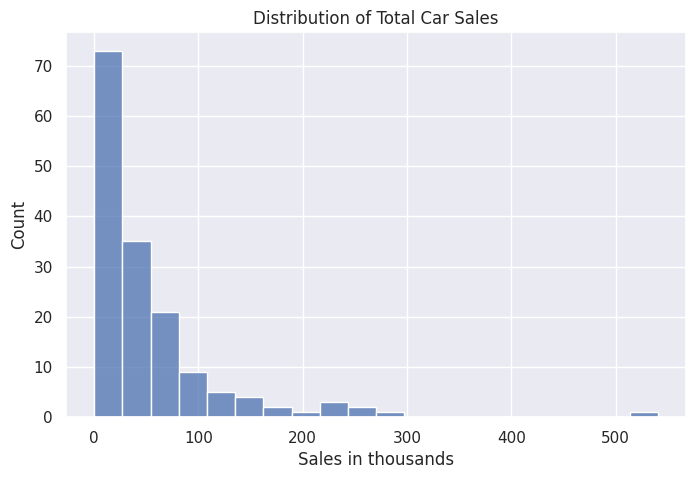

In [60]:
plt.figure(figsize=(8,5))
sns.histplot(df['Sales in thousands'], bins=20)
plt.title("Distribution of Total Car Sales")
plt.show()

- Shows how shipment sizes are distributed
- Right skew = many small shipments, few large ones

### Distribution of Price

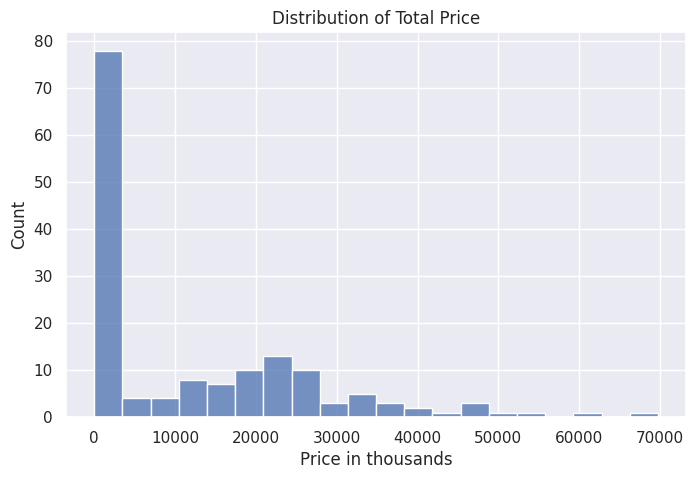

In [61]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price in thousands'], bins=20)
plt.title("Distribution of Total Price")
plt.show()

## Bivariate Analysis

### Revenue by Manufacturer

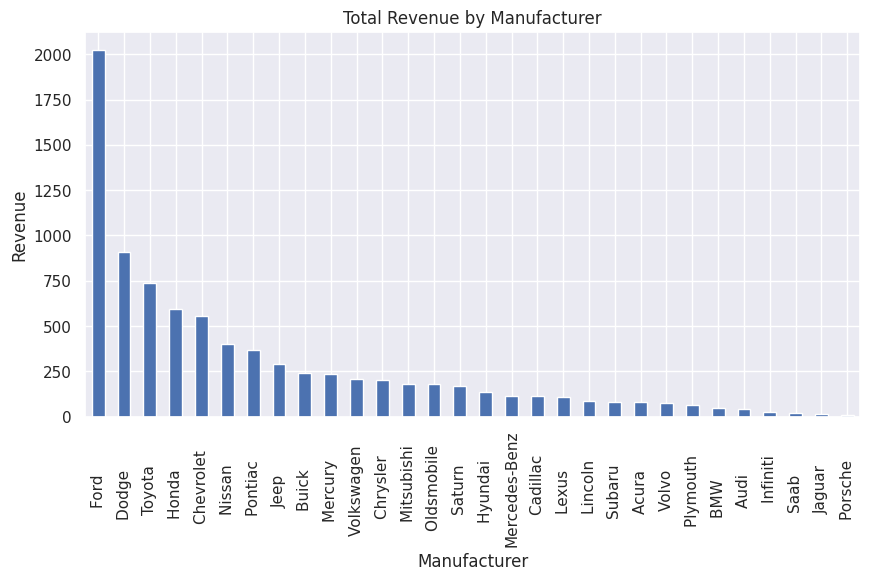

,Sales in thousands
Manufacturer,
Ford,2022.635
Dodge,910.149
Toyota,740.205
Honda,592.674
Chevrolet,554.365
Nissan,399.635
Pontiac,370.534
Jeep,293.153
Buick,242.019


In [62]:
country_revenue = df.groupby('Manufacturer')['Sales in thousands'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
country_revenue.plot(kind='bar')
plt.title("Total Revenue by Manufacturer")
plt.ylabel("Revenue")
plt.show()

country_revenue

### Revenue by Model

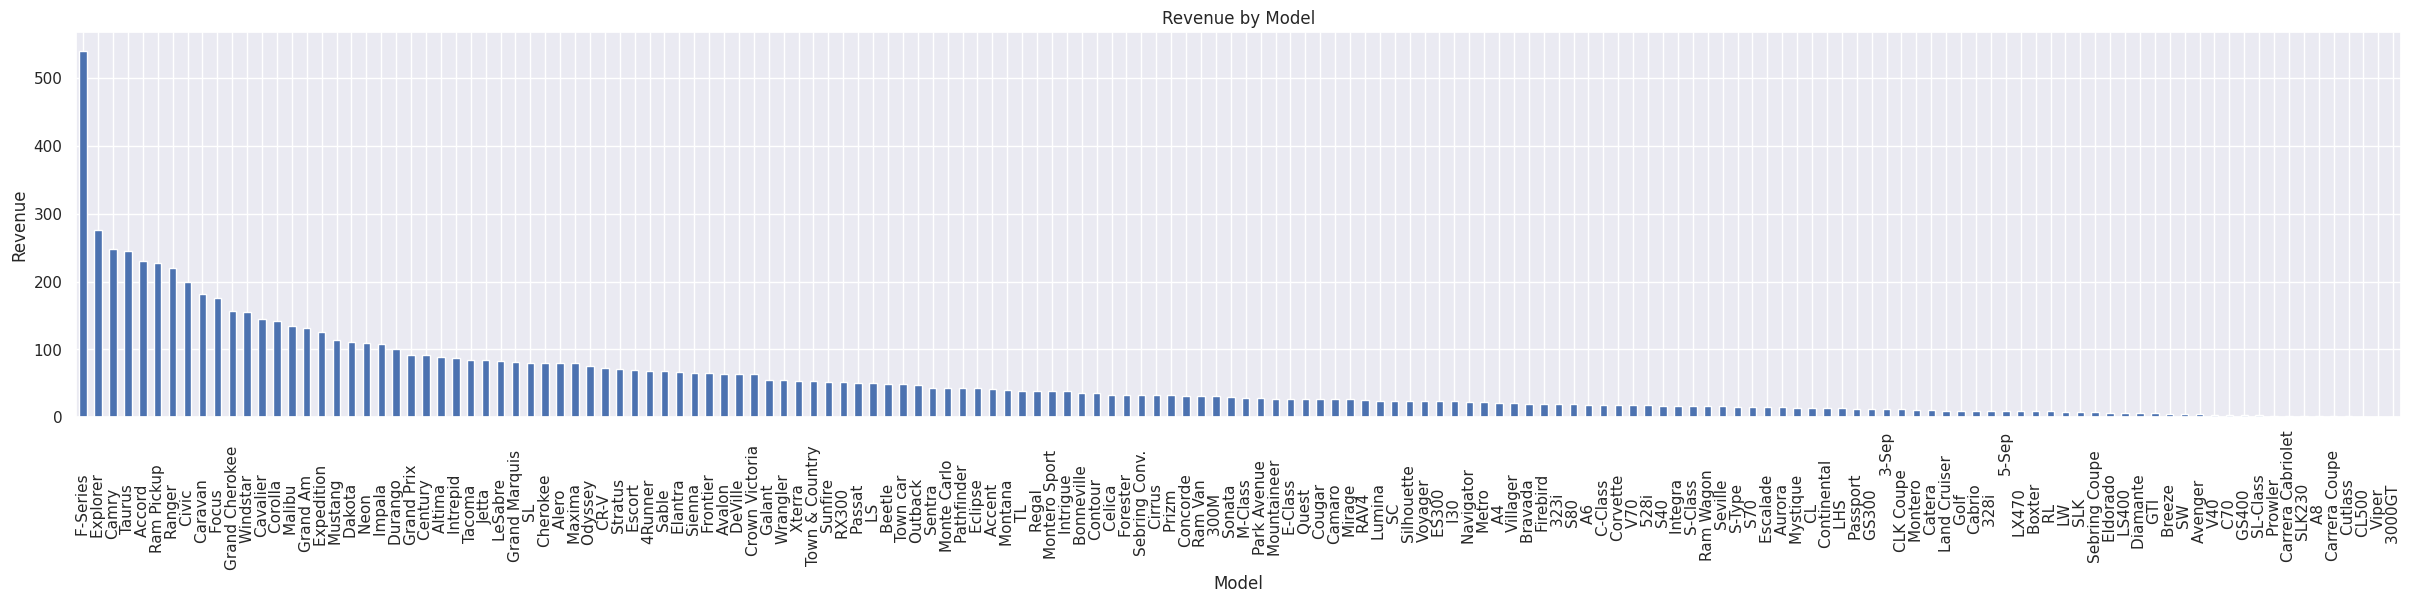

,Sales in thousands
Model,
F-Series,540.561
Explorer,276.747
Camry,247.994
Taurus,245.815
Accord,230.902
...,...
Carrera Coupe,1.280
Cutlass,1.112
CL500,0.954


In [63]:
product_revenue = df.groupby('Model')['Sales in thousands'].sum().sort_values(ascending=False)

plt.figure(figsize=(30,5))
product_revenue.plot(kind='bar')
plt.title("Revenue by Model")
plt.ylabel("Revenue")
plt.show()

product_revenue

### Revenue by Vehicle Type

In [64]:
salesperson_revenue = df.groupby('Vehicle type')['Sales in thousands'].sum().sort_values(ascending=False)

salesperson_revenue.head(10)

,Sales in thousands
Vehicle type,
Passenger,5015.184
Car,3305.514


### Latest Launch vs Sales in Thousands

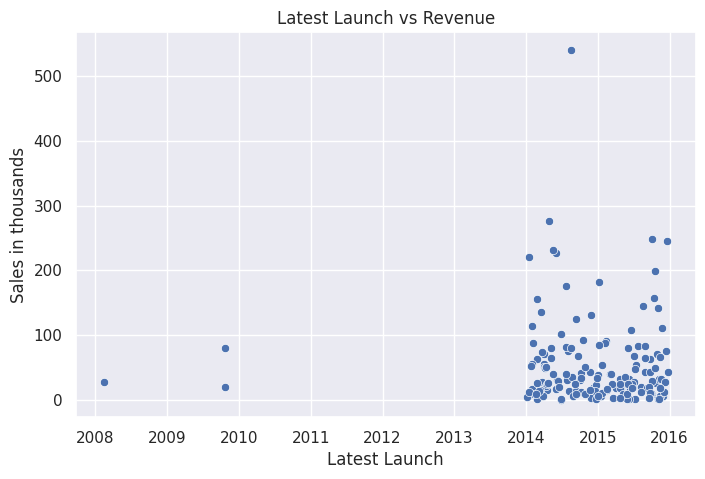

In [65]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Latest Launch', y='Sales in thousands', data=df)
plt.title("Latest Launch vs Revenue")
plt.show()

### Correlation Matrix

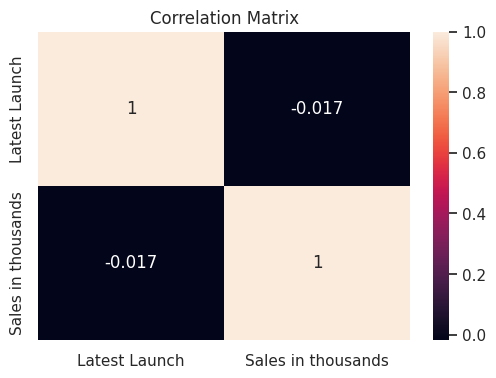

In [66]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Latest Launch', 'Sales in thousands']].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

- Correlation close to 1 = strong positive relationship
- Close to 0 = weak relationship

## Time-Based Analysis
### Revenue based on latest launch year Trend

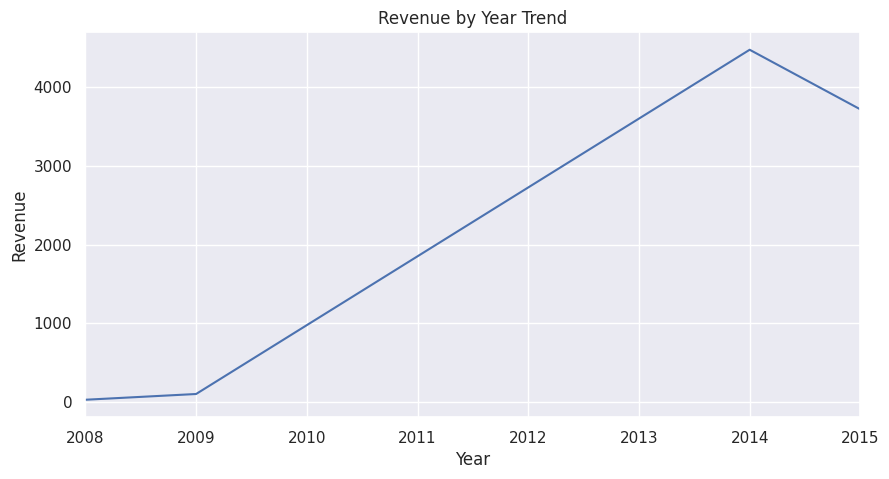

In [67]:
df['Year'] = df['Latest Launch'].dt.to_period('Y')

monthly_revenue = df.groupby('Year')['Sales in thousands'].sum()

plt.figure(figsize=(10,5))
monthly_revenue.plot()
plt.title("Revenue by Year Trend")
plt.ylabel("Revenue")
plt.show()

# Assignment

In this assignment, you will apply the EDA techniques learned in class to a dataset of your choice. You must submit the dataset file with your notebook.


End of lab 3.